<a href="https://colab.research.google.com/github/arshhad45/EDA-projects/blob/main/Shopper_Spectrum_Customer_Segmentation_and_Product_Recommendations_in_E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Dataset Collection and understanding

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/online_retail.csv")
df.head(6)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2022-12-01 08:26:00,7.65,17850.0,United Kingdom


In [2]:
df.shape

(541909, 8)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
#missing values
df.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


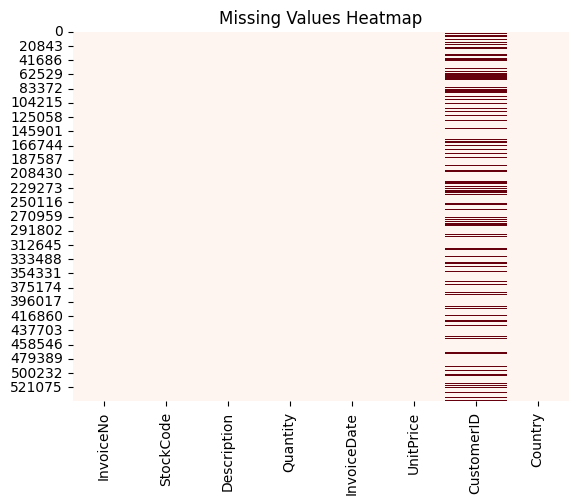

In [10]:
#visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Values Heatmap")
plt.show()

In [12]:
#identify duplicates
df.duplicated().sum()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2022-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2022-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2022-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2022-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2022-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2023-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2023-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2023-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2023-12-09 11:34:00,2.10,14446.0,United Kingdom


# 2. Data preprocessing

In [13]:
#Remove rows with missing CustomerID
# Check for missing CustomerID
df['CustomerID'].isnull().sum()

# Remove rows where CustomerID is NaN
df = df[df['CustomerID'].notnull()]


In [14]:
#Exclude cancelled invoices (InvoiceNo starting with 'C)
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [15]:
#Remove Negative or Zero Quantities and Prices
# Remove rows with Quantity <= 0 or UnitPrice <= 0
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]


In [17]:

print("Shape after preprocessing:", df.shape)
print("Missing values:\n", df.isnull().sum())


Shape after preprocessing: (397884, 8)
Missing values:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


# 3: Exploratory Data Analysis (EDA)

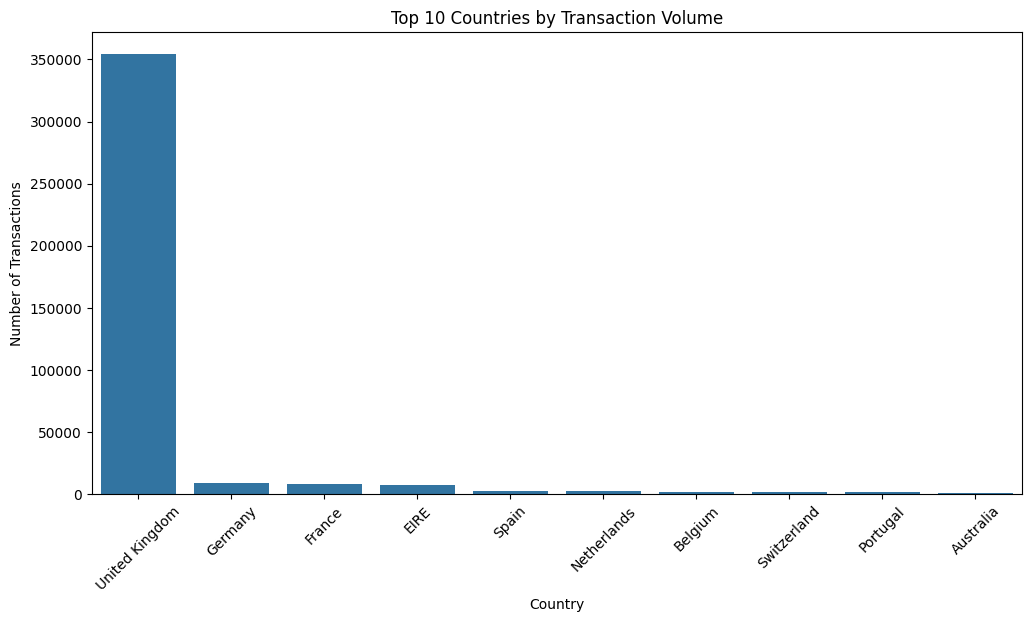

In [18]:
#1. Analyze Transaction Volume by Country
country_counts = df['Country'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=country_counts.index[:10], y=country_counts.values[:10])
plt.title('Top 10 Countries by Transaction Volume')
plt.xticks(rotation=45)
plt.ylabel("Number of Transactions")
plt.show()


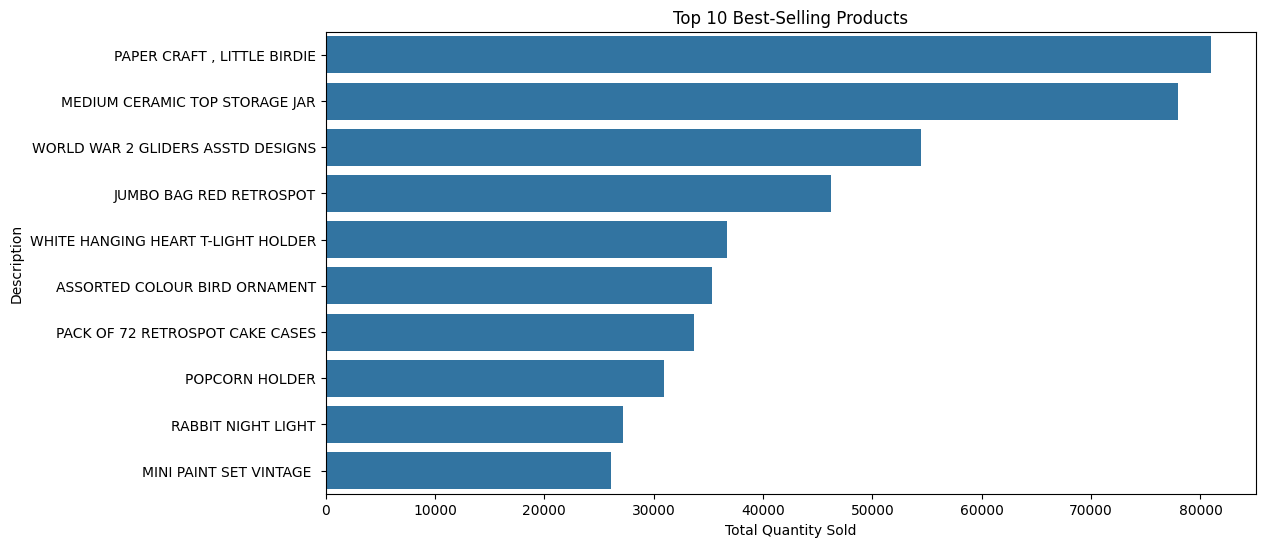

In [19]:
#2. Identify Top-Selling Products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Best-Selling Products')
plt.xlabel("Total Quantity Sold")
plt.show()


/tmp/ipython-input-4262109474.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M').sum()['Quantity']


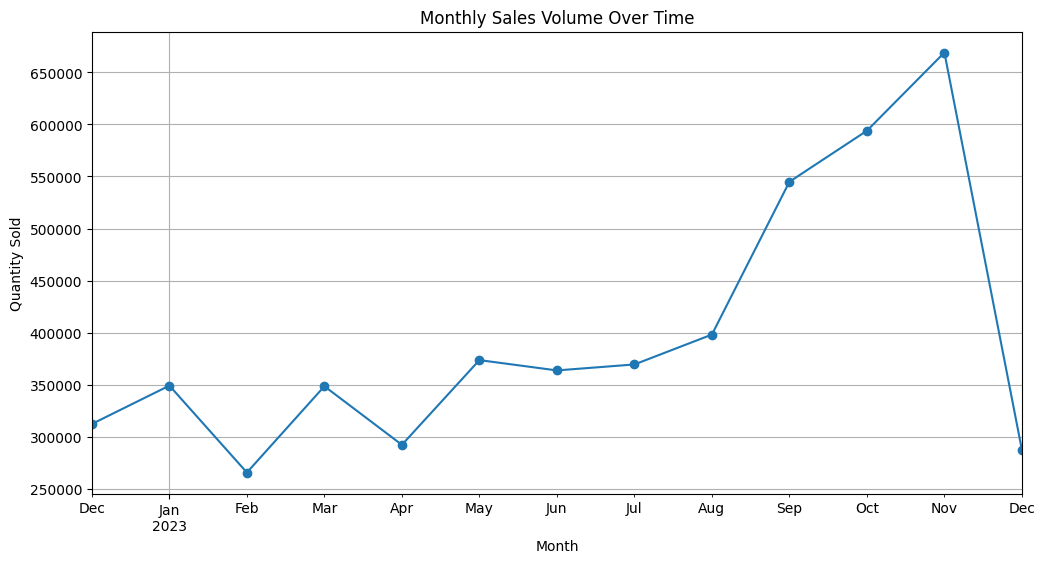

In [20]:
#3.  Visualize Purchase Trends Over Time
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.set_index('InvoiceDate', inplace=True)

monthly_sales = df.resample('M').sum()['Quantity']

plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Volume Over Time')
plt.ylabel("Quantity Sold")
plt.xlabel("Month")
plt.grid()
plt.show()


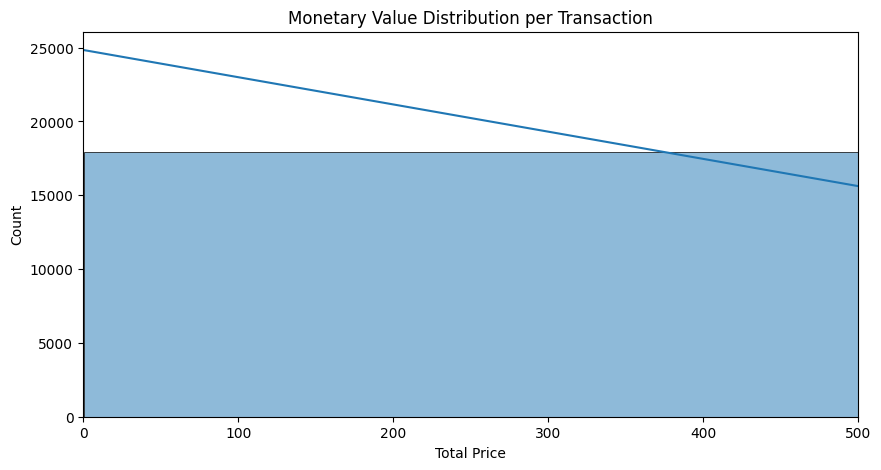

In [21]:
#Total price per transaction
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
transaction_values = df.groupby('InvoiceNo')['TotalPrice'].sum()

plt.figure(figsize=(10,5))
sns.histplot(transaction_values, bins=100, kde=True)
plt.title('Monetary Value Distribution per Transaction')
plt.xlabel("Total Price")
plt.xlim(0, 500)  # adjust for outliers
plt.show()


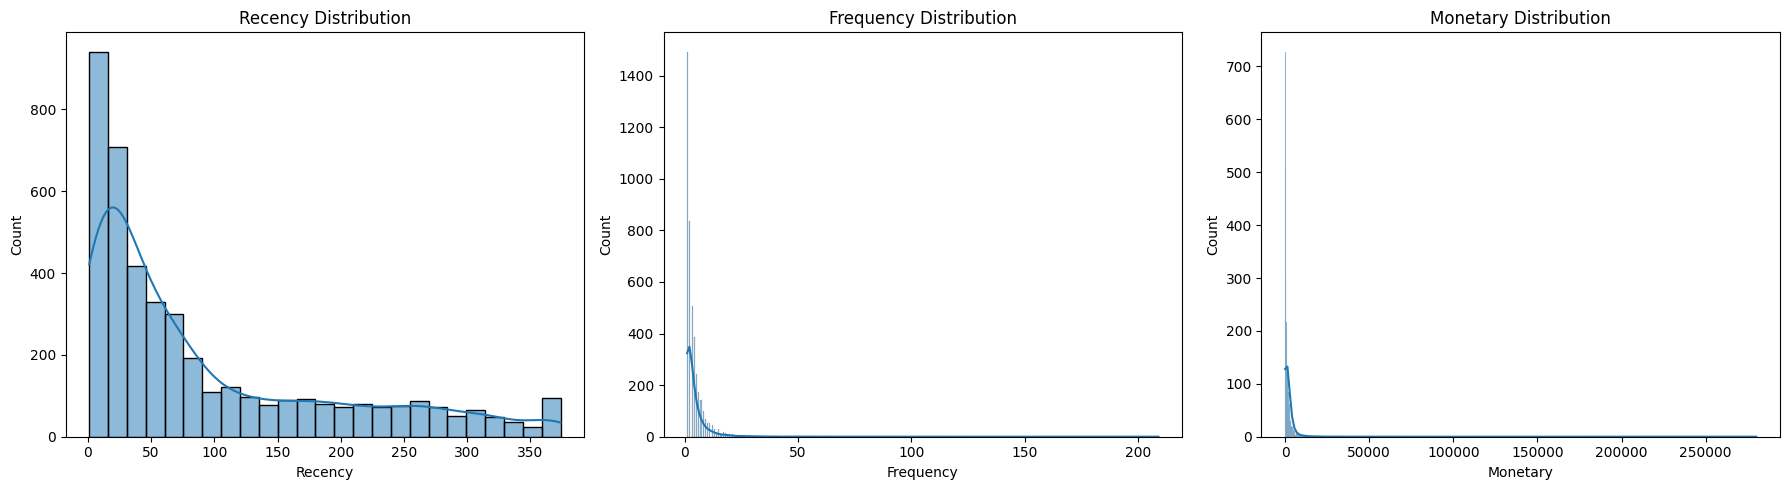

In [24]:
#5. RFM Distributions (Recency, Frequency, Monetary)
# Reset index to make InvoiceDate a column again
df.reset_index(inplace=True)

snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Visualize distributions
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(rfm['Recency'], ax=ax[0], kde=True)
ax[0].set_title('Recency Distribution')
sns.histplot(rfm['Frequency'], ax=ax[1], kde=True)
ax[1].set_title('Frequency Distribution')
sns.histplot(rfm['Monetary'], ax=ax[2], kde=True)
ax[2].set_title('Monetary Distribution')
plt.tight_layout()
plt.show()

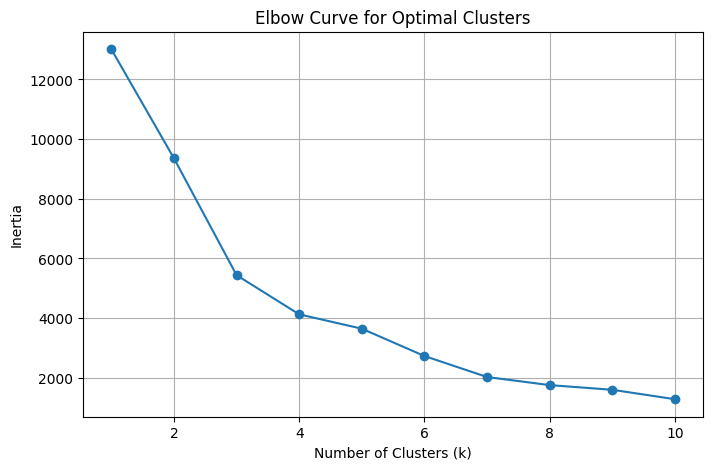

In [25]:
# Elbow Curve for KMeans Cluster Selection
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Curve for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


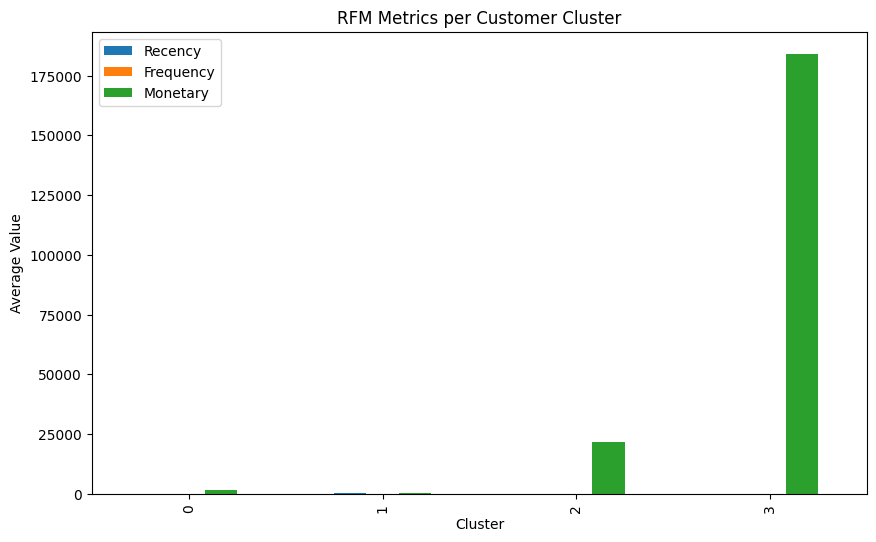

In [26]:
## Fit KMeans with optimal k (e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=1)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Visualize cluster characteristics
rfm.groupby('Cluster').mean().plot(kind='bar', figsize=(10,6))
plt.title('RFM Metrics per Customer Cluster')
plt.ylabel("Average Value")
plt.show()


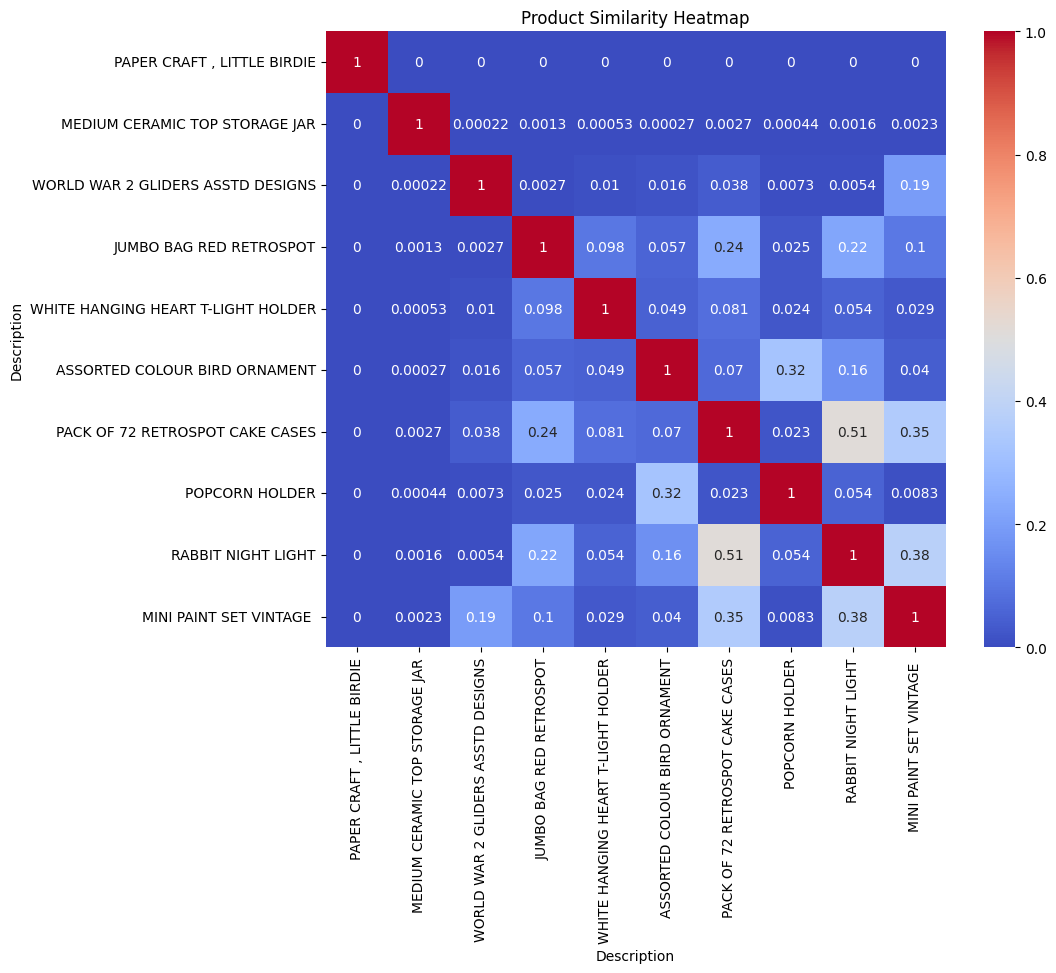

In [29]:
#Product Recommendation Heatmap / Similarity Matrix
prod_matrix = df.pivot_table(index='CustomerID', columns='Description', values='Quantity', aggfunc='sum').fillna(0)

from sklearn.metrics.pairwise import cosine_similarity

similarity = pd.DataFrame(cosine_similarity(prod_matrix.T),
                          index=prod_matrix.columns,
                          columns=prod_matrix.columns)
top_items = top_products.index.tolist()
plt.figure(figsize=(10,8))
sns.heatmap(similarity.loc[top_items, top_items], cmap='coolwarm', annot=True)
plt.title('Product Similarity Heatmap')
plt.show()



In [31]:
#4: Clustering Methodology

# Feature Engineering (RFM Calculation)

snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.reset_index()

In [32]:
# Standardize the RFM values

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


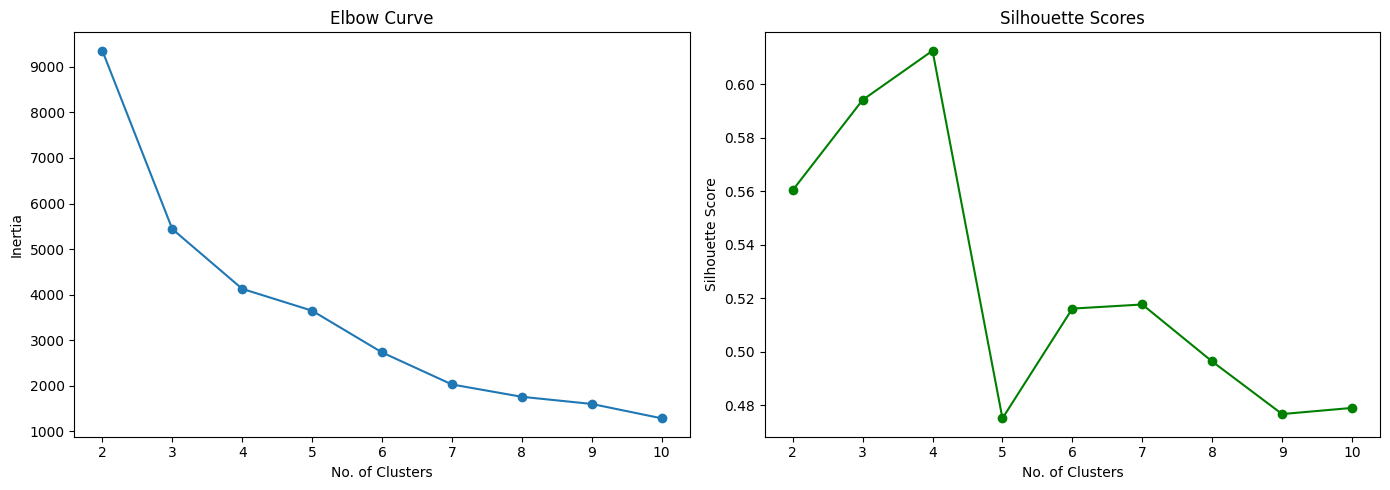

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(rfm_scaled)
    inertia.append(model.inertia_)
    silhouette_scores.append(silhouette_score(rfm_scaled, model.labels_))

# Plot Elbow and Silhouette
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(K, inertia, marker='o')
ax[0].set_title("Elbow Curve")
ax[0].set_xlabel("No. of Clusters")
ax[0].set_ylabel("Inertia")

ax[1].plot(K, silhouette_scores, marker='o', color='green')
ax[1].set_title("Silhouette Scores")
ax[1].set_xlabel("No. of Clusters")
ax[1].set_ylabel("Silhouette Score")

plt.tight_layout()
plt.show()


In [34]:
# Run Final Clustering (e.g., K = 4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=1)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [35]:
# Label the Clusters Based on RFM Averages

rfm_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(2)

# Define Segment Labels
def segment(row):
    if row['Recency'] < 30 and row['Frequency'] > 10 and row['Monetary'] > 1000:
        return 'High-Value'
    elif row['Frequency'] >= 5 and row['Monetary'] >= 300:
        return 'Regular'
    elif row['Recency'] > 150 and row['Frequency'] < 3:
        return 'At-Risk'
    else:
        return 'Occasional'

rfm['Segment'] = rfm.apply(segment, axis=1)

# Show cluster summary
rfm.groupby(['Cluster', 'Segment']).agg({
    'Recency': 'mean', 'Frequency': 'mean', 'Monetary': 'mean'
})


Recency  Frequency       Monetary
Cluster Segment                                         
0       High-Value   10.202020  14.308081    5414.189646
        Occasional   49.678325   2.179015     811.458501
        Regular      30.469543   6.979695    2670.913515
1       At-Risk     256.877327   1.238773     394.293944
        Occasional  189.208633   2.791367    1416.812806
        Regular     219.958333   6.333333    1751.883750
2       At-Risk     326.000000   1.000000   77183.600000
        High-Value    5.340659  35.142857   20819.303297
        Regular     118.750000  34.000000   27925.147500
3       High-Value    7.666667  76.000000  186755.555000
        Occasional    1.000000   2.000000  168472.500000

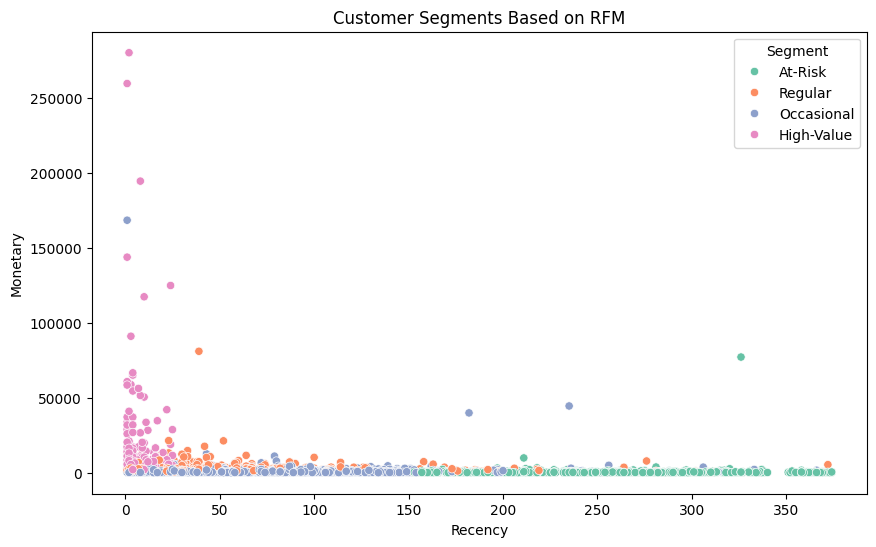

In [36]:
# Visualize Clusters (2D and 3D)
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Segment', palette='Set2')
plt.title("Customer Segments Based on RFM")
plt.show()


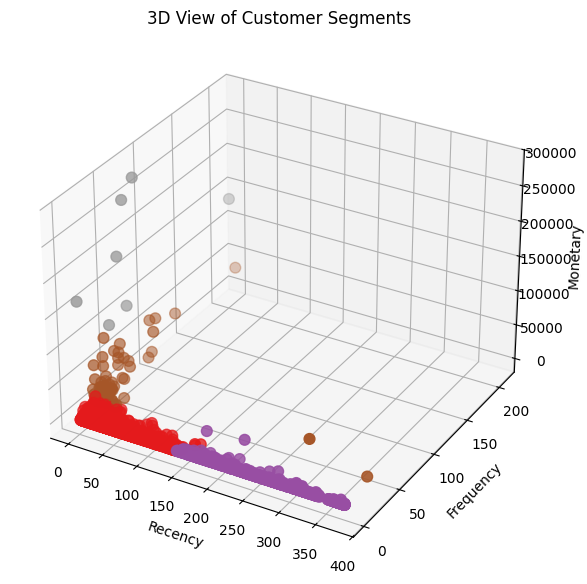

In [37]:
#3d plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'],
                     c=rfm['Cluster'], cmap='Set1', s=60)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D View of Customer Segments')
plt.show()


In [66]:
#save best perfroming model for streamlit
import joblib

# Save scaler and model
joblib.dump(scaler, "scaler.pkl")
joblib.dump(kmeans, "rfm_kmeans_model.pkl")


['rfm_kmeans_model.pkl']

In [67]:
# Save the preprocessed dataframe to a CSV file
df.to_csv("cleaned_shopper_data.csv", index=False)

In [72]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics.pairwise import cosine_similarity

st.set_page_config(page_title="Shopper Spectrum App", layout="wide")
st.title("🛍️ Shopper Spectrum: Product Recommendation & Customer Segmentation")

@st.cache_data
def load_data():
    df = pd.read_csv("cleaned_shopper_data.csv")
    pivot = pd.pivot_table(df, index='CustomerID', columns='Description', values='Quantity', aggfunc='sum').fillna(0)
    sim_matrix = cosine_similarity(pivot.T)
    sim_df = pd.DataFrame(sim_matrix, index=pivot.columns, columns=pivot.columns)
    return df, sim_df

df, sim_df = load_data()

scaler = joblib.load("scaler.pkl")
model = joblib.load("rfm_kmeans_model.pkl")

recommend_tab, segment_tab = st.tabs(["📦 Product Recommendation", "👥 Customer Segmentation"])

with recommend_tab:
    st.subheader("🎯 Product Recommendation Module")
    product_input = st.text_input("Enter a product name (case-sensitive, from 'Description' column):")
    if st.button("Get Recommendations"):
        if product_input in sim_df.index:
            top5 = sim_df[product_input].sort_values(ascending=False).iloc[1:6]
            st.success(f"Top 5 Recommendations for '{product_input}'")
            for i, (prod, score) in enumerate(top5.items(), 1):
                st.markdown(f"**{i}.** {prod} _(Similarity: {score:.2f})_")
        else:
            st.error("Product not found. Please check the spelling or casing.")

with segment_tab:
    st.subheader("🎯 Customer Segmentation Module")
    recency = st.number_input("Recency (days)", min_value=0)
    frequency = st.number_input("Frequency (number of purchases)", min_value=0)
    monetary = st.number_input("Monetary (₹ total spend)", min_value=0.0)
    if st.button("Predict Cluster"):
        user_data = pd.DataFrame([[recency, frequency, monetary]], columns=['Recency', 'Frequency', 'Monetary'])
        scaled_data = scaler.transform(user_data)
        cluster = model.predict(scaled_data)[0]
        def get_segment_label(r, f, m):
            if r < 30 and f > 10 and m > 1000:
                return "High-Value"
            elif f >= 5 and m >= 300:
                return "Regular"
            elif r > 150 and f < 3:
                return "At-Risk"
            else:
                return "Occasional"
        segment = get_segment_label(recency, frequency, monetary)
        st.success(f"🧠 Predicted Cluster: **{segment}** (Cluster #{cluster})")

st.markdown("---")
st.markdown("Made with ❤️ using Streamlit")
st.markdown("**Tags:** Pandas, Scikit-Learn, Cosine Similarity, KMeans, RFM, E-Commerce, Collaborative Filtering")


Overwriting app.py


In [74]:
from pyngrok import ngrok
import time

# Kill any existing tunnels
ngrok.kill()

# Create tunnel with correct parameters (important for v7+)
public_url = ngrok.connect(addr="8501", proto="http")
print(f"🌍 Your Streamlit app is live at: {public_url}")

# Run the Streamlit app in background
!streamlit run app.py &>/content/logs.txt &

# Wait for a few seconds to allow the app to launch
time.sleep(5)
print("✅ Streamlit app is running. Click the link above to open it.")

🌍 Your Streamlit app is live at: NgrokTunnel: "https://4e989de9dbb8.ngrok-free.app" -> "http://localhost:8501"
✅ Streamlit app is running. Click the link above to open it.
